In [36]:
import random
from matplotlib import pyplot as plt 

In [69]:
def prob_ab(A, B):
    if not A and not B:
        return 30
    elif not A and B:
        return 5
    elif A and not B:
        return 1
    else:
        return 10

def prob_bc(B, C):
    if not B and not C:
        return 100
    elif not B and C:
        return 1
    elif B and not C:
        return 1
    else:
        return 100
    
def prob_cd(C, D):
    if not C and not D:
        return 1
    elif not C and D:
        return 100
    elif C and not D:
        return 100
    else:
        return 1
    
def prob_da(D, A):
    if not D and not A:
        return 100
    elif not D and A:
        return 1
    elif D and not A:
        return 1
    else:
        return 100

def random_bool(v1, v2):
    p = v1 / (v1 + v2)
    return random.uniform(0, 1) <= p

def next_variable(curr_variable):
    variables = ['A', 'C', 'D']
    return random.choice(variables)

def sample_variable(curr_variable, A, B, C, D):
    if curr_variable == 'A':
        A0 = prob_ab(0, B) * prob_da(D, 0)
        A1 = prob_ab(1, B) * prob_da(D, 1)
        A = random_bool(A0, A1)
    
    elif curr_variable == 'D':
        D0 = prob_cd(C, 0) * prob_da(0, A)
        D1 = prob_cd(C, 1) * prob_da(1, A)
        D = random_bool(D0, D1)
    
    elif curr_variable == 'C':
        C0 = prob_cd(0, D) * prob_bc(B, 0)
        C1 = prob_cd(1, D) * prob_bc(B, 1)
        C = random_bool(C0, C1)
    
    return A, B, C, D
      

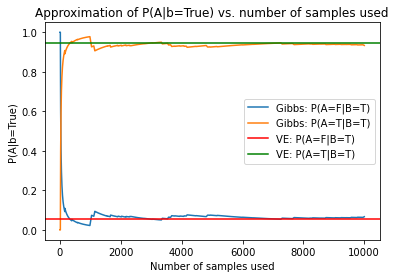

In [73]:
A1_count = 0
A0_count = 0
num_samples = 10000
curr_variable = 'A'
(A, B, C, D) = (True, True, True, True)

pa0_givenb1 = []
pa1_givenb1 = []
for i in range(1,num_samples+1):
    (A, B, C, D) = sample_variable(curr_variable, A, B, C, D)
    if A:
        A1_count += 1
    else:
        A0_count += 1
    curr_variable = next_variable(curr_variable)
    pa0_givenb1.append(A0_count / i)
    pa1_givenb1.append(A1_count / i)
    
plt.title("Approximation of P(A|b=True) vs. number of samples used") 
plt.xlabel("Number of samples used") 
plt.ylabel("P(A|b=True)") 
plt.plot(list(range(1,10001)), pa0_givenb1, label='Gibbs: P(A=F|B=T)')
plt.plot(list(range(1,10001)), pa1_givenb1, label='Gibbs: P(A=T|B=T)')
plt.axhline(y=0.05659, color='r', linestyle='-', label='VE: P(A=F|B=T)')
plt.axhline(y=0.94341, color='g', linestyle='-', label='VE: P(A=T|B=T)')
plt.legend()
plt.show()